In [1]:
import json
import numpy 
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import pyarrow
import sys
from tqdm import tqdm
import seaborn as sns
from datetime import date
from dotenv import load_dotenv
from sqlalchemy import create_engine
from os import path
from typing import List,Dict, Tuple
from collections import defaultdict
pd.set_option("display.max_columns", None)

load_dotenv(verbose=True)
BIGQUERY_CREDENTIALS_PATH = os.environ.get('BIGQUERY_CREDENTIALS_PATH')
engine = create_engine('bigquery://bespoke-financial/ProdMetrcData', credentials_path=os.path.expanduser(BIGQUERY_CREDENTIALS_PATH))

sys.path.append(path.realpath(path.join(os.getcwd(), "../core")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../src")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../scripts")))

import create_queries
import prepare_data

from bespoke.inventory.analysis.shared import download_util, inventory_types
from bespoke.inventory.analysis import active_inventory_util as util
from bespoke.inventory.analysis import inventory_valuations_util as valuations_util
from underwriting import msrp_band_analyzer

%load_ext autoreload
%autoreload 2

/Users/victoria/GitHub/venvs/bespoke/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
COMPANY_IDENTIFIER_LIST = [
    'DL',
    'DW',
    'EMA',
    'EMM',
    'EMT',
    'EMF',
    'ST',
    'GRG',
    'EL',
    'VS',
]

In [3]:
mba = msrp_band_analyzer.MSRPBand()

In [4]:
mba.update_company_data(COMPANY_IDENTIFIER_LIST)


Verifying download summaries for license C10-0000786-LIC...
Earliest download summary: 2021-10-12
Latest download summary: 2022-03-29

Verifying download summaries for license C9-0000370-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-29

Verifying download summaries for license MR282376...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-29
Found bad download summary for license MR282376 on date 2022-03-24

Verifying download summaries for license 402-00840...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-29

Verifying download summaries for license 403-01293...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-29

Verifying download summaries for license 402R-00545...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-29

Verifying download summaries for license 403R-01201...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-29

Verifying download

/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])


### Combining same product categories with different measurements ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:306: SettingWithCopyWarn

### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:336: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:336: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &


### Available combined product category name in costs dataframe ### 	
['buds' 'concentrate' 'infused' 'edible' 'shake/trim' 'flower'
 'vape cartridge' 'other concentrate' 'pre-roll leaf' 'pre-roll flower'
 'pre-roll infused' 'extract' 'topical' 'tincture' 'capsule' 'shake'
 'wet whole plants' 'vape product' 'raw pre-rolls' 'kief' 'seeds'
 'shake/trim allocated for extraction' 'infused butter/oil'
 'infused pre-rolls' 'infused beverage' 'clone - cutting' 'immature plant']
### Available combined product category name in sales dataframe ### 	
['other concentrate' 'concentrate' 'shake/trim' 'pre-roll flower' 'edible'
 'flower' 'buds' 'infused' 'extract' 'vape cartridge' 'pre-roll infused'
 'pre-roll leaf' 'topical' 'immature plants' 'capsule' 'tincture' 'shake'
 'vape product' 'raw pre-rolls' 'kief'
 'shake/trim allocated for extraction' 'infused butter/oil'
 'infused pre-rolls' 'seeds' 'infused beverage' 'clone - cutting']


### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.2820665083135392 %
Number of transactions outliers above Boxplot Whisker Maximum is 8.138011736761213 %


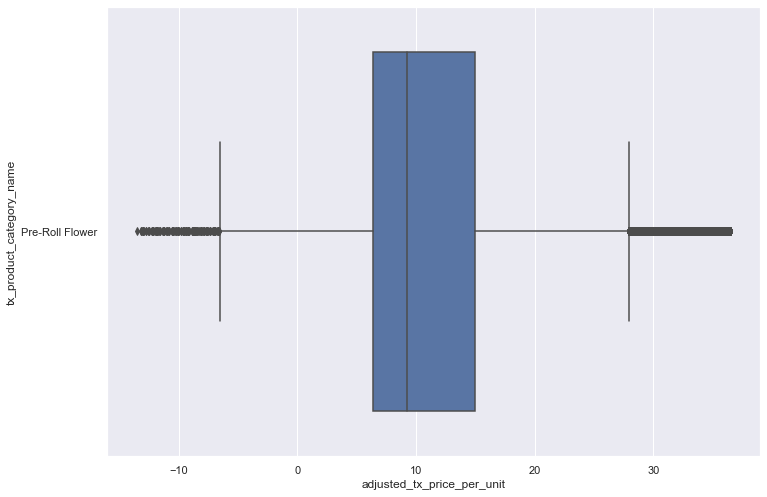

### Checking histogram distribution of MSRP for given tx_product_category_name ### 	
Total number of transactions for Pre-Roll Flower in tx_product_category_name : 104870


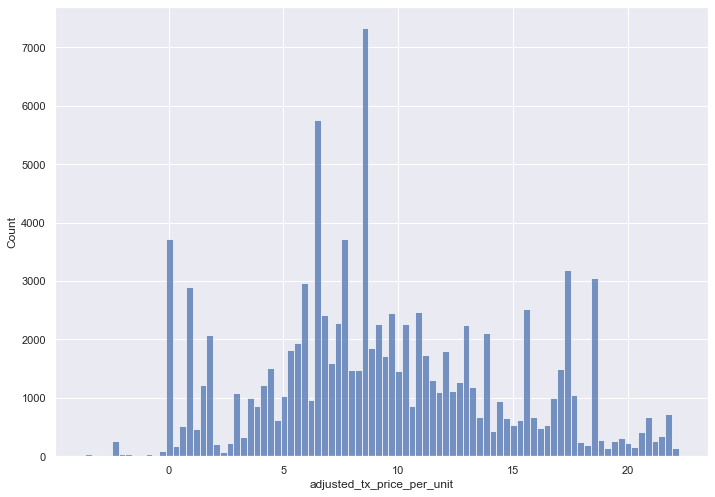

### Outputting summary table ### 	
count    104870.00
mean          9.43
std           5.33
min          -3.64
25%           6.02
50%           8.67
75%          13.01
max          22.21
Name: Pre-Roll Flower, dtype: float64
### Outputting summary table by time broken down in months ### 	
                count   mean   std   min   25%    50%    75%    max
date_in_month                                                      
2020-01        1233.0   8.81  2.80  0.00  6.18   9.22  10.85  17.51
2020-02        1006.0   8.47  2.52  0.00  6.49   8.81   9.79  19.05
2020-03        1412.0   7.76  2.05  0.00  6.79   7.54   8.81  17.51
2020-04        1533.0   7.64  2.34  0.01  6.37   7.49   9.76  17.51
2020-05        1707.0   6.53  2.27  0.00  4.96   6.54   7.49  17.78
2020-06        2343.0   8.48  4.75  0.00  5.89   6.54   7.92  20.88
2020-07        3606.0   9.71  5.71  0.00  5.89   7.49  13.92  22.18
2020-08        4449.0   9.98  5.71  0.00  5.89   7.15  15.47  21.30
2020-09        3803.0   9.80  

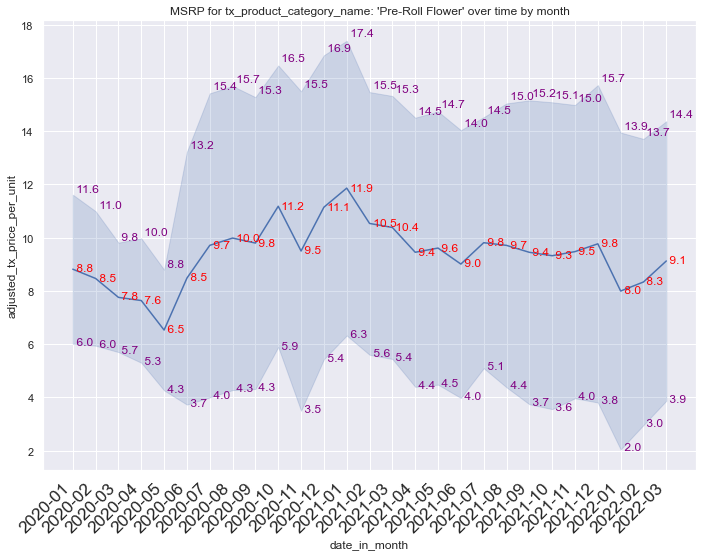

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-01                         6.01                  11.61
2020-02                         5.95                  10.99
2020-03                         5.71                   9.81
2020-04                         5.30                   9.98
2020-05                         4.26                   8.80
2020-06                         3.73                  13.23
2020-07                         4.00                  15.42
2020-08                         4.27                  15.69
2020-09                         4.32                  15.28
2020-10                         5.89                  16.47
2020-11                         3.50                  15.50
2020-12                         5.43                  16.85
2021-01                         6.33                  17.39
2021-02                         5.60                  15.46
2021-03                         5.44    

In [28]:
mba.run_analysis('tx_product_category_name', 'Pre-Roll Flower', 'S',use_unit_converted_price = True)

In [29]:
#true
mba.msrp_summary_table_by_time

,count,mean,std,min,25%,50%,75%,max,lower_confidence_band,upper_confidence_band
date_in_month,,,,,,,,,,
2020-01,1233.0,8.81,2.80,0.00,6.18,9.22,10.85,17.51,6.01,11.61
2020-02,1006.0,8.47,2.52,0.00,6.49,8.81,9.79,19.05,5.95,10.99
2020-03,1412.0,7.76,2.05,0.00,6.79,7.54,8.81,17.51,5.71,9.81
2020-04,1533.0,7.64,2.34,0.01,6.37,7.49,9.76,17.51,5.30,9.98
2020-05,1707.0,6.53,2.27,0.00,4.96,6.54,7.49,17.78,4.26,8.80
2020-06,2343.0,8.48,4.75,0.00,5.89,6.54,7.92,20.88,3.73,13.23
2020-07,3606.0,9.71,5.71,0.00,5.89,7.49,13.92,22.18,4.00,15.42
2020-08,4449.0,9.98,5.71,0.00,5.89,7.15,15.47,21.30,4.27,15.69
2020-09,3803.0,9.80,5.48,0.00,5.89,7.15,14.58,21.36,4.32,15.28


### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.4357776294459807 %
Number of transactions outliers above Boxplot Whisker Maximum is 14.000190712310479 %


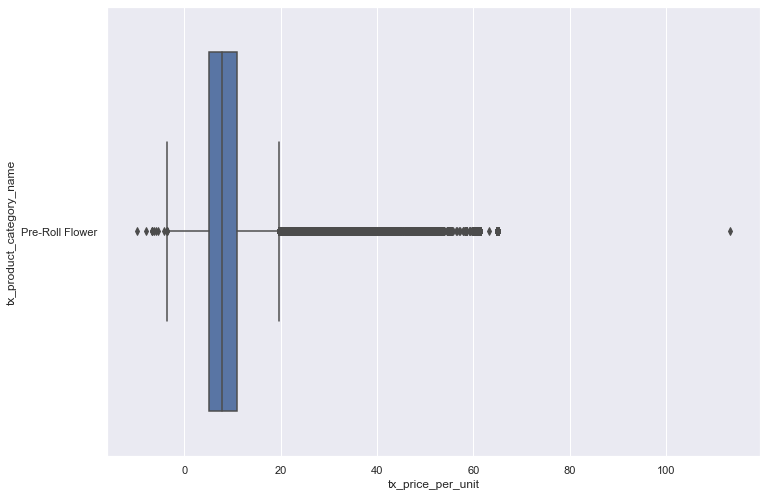

### Checking histogram distribution of MSRP for given tx_product_category_name ### 	
Total number of transactions for Pre-Roll Flower in tx_product_category_name : 89731


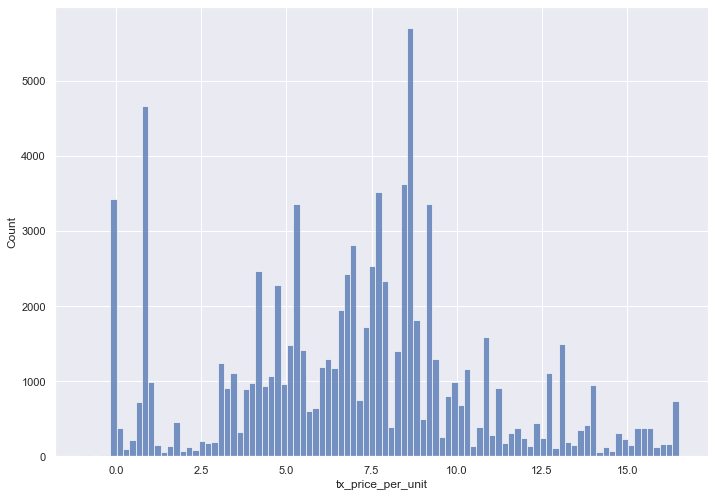

### Outputting summary table ### 	
count    89731.00
mean         7.00
std          3.73
min         -0.91
25%          4.69
50%          7.29
75%          8.87
max         16.51
Name: Pre-Roll Flower, dtype: float64
### Outputting summary table by time broken down in months ### 	
                count  mean   std   min   25%   50%    75%    max
date_in_month                                                    
2020-01        1047.0  6.82  1.75  0.00  5.87  6.97   7.81  15.99
2020-02         902.0  6.65  1.60  0.00  6.05  7.05   7.83  16.40
2020-03        1246.0  6.64  1.39  0.00  6.41  6.97   7.54  15.75
2020-04        1423.0  6.65  1.70  0.01  5.41  7.05   7.81  16.16
2020-05        1634.0  5.82  1.85  0.00  4.71  5.24   7.36  15.72
2020-06        2141.0  6.09  2.34  0.00  4.71  5.23   7.49  15.78
2020-07        2919.0  6.38  3.34  0.00  4.71  5.23   9.28  15.96
2020-08        3398.0  6.52  3.30  0.00  4.71  5.23   8.87  16.51
2020-09        3060.0  6.61  3.15  0.00  4.71  5.23   8.87

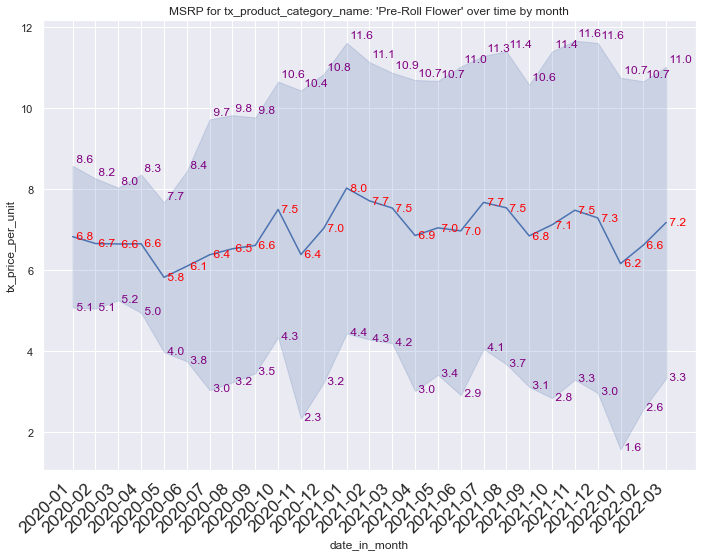

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-01                         5.07                   8.57
2020-02                         5.05                   8.25
2020-03                         5.25                   8.03
2020-04                         4.95                   8.35
2020-05                         3.97                   7.67
2020-06                         3.75                   8.43
2020-07                         3.04                   9.72
2020-08                         3.22                   9.82
2020-09                         3.46                   9.76
2020-10                         4.34                  10.64
2020-11                         2.33                  10.43
2020-12                         3.23                  10.83
2021-01                         4.44                  11.60
2021-02                         4.29                  11.13
2021-03                         4.19    

In [30]:
mba.run_analysis('tx_product_category_name', 'Pre-Roll Flower', 'S',use_unit_converted_price = False)

In [31]:
#false
mba.msrp_summary_table_by_time

,count,mean,std,min,25%,50%,75%,max,lower_confidence_band,upper_confidence_band
date_in_month,,,,,,,,,,
2020-01,1047.0,6.82,1.75,0.00,5.87,6.97,7.81,15.99,5.07,8.57
2020-02,902.0,6.65,1.60,0.00,6.05,7.05,7.83,16.40,5.05,8.25
2020-03,1246.0,6.64,1.39,0.00,6.41,6.97,7.54,15.75,5.25,8.03
2020-04,1423.0,6.65,1.70,0.01,5.41,7.05,7.81,16.16,4.95,8.35
2020-05,1634.0,5.82,1.85,0.00,4.71,5.24,7.36,15.72,3.97,7.67
2020-06,2141.0,6.09,2.34,0.00,4.71,5.23,7.49,15.78,3.75,8.43
2020-07,2919.0,6.38,3.34,0.00,4.71,5.23,9.28,15.96,3.04,9.72
2020-08,3398.0,6.52,3.30,0.00,4.71,5.23,8.87,16.51,3.22,9.82
2020-09,3060.0,6.61,3.15,0.00,4.71,5.23,8.87,16.24,3.46,9.76


In [ ]:
#mba.run_analysis('product_category_name', 'Pre-Roll Flower', 'C')

In [ ]:
#mba.run_analysis('combined_product_category', 'flower', 'S')

In [ ]:
#mba.run_analysis('combined_product_category', 'flower', 'C')